In [220]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from icecream import ic
from pathlib import Path
import random
from sklearn.model_selection import train_test_split

In [ ]:
RANDOM_STATE = 21

In [ ]:
random.seed(RANDOM_STATE)

In [290]:
def calculate_vif_(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"dropping {X.iloc[:, variables].columns[maxloc]} at index: {maxloc}")
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [333]:
def drop_correlated(X, thresh = 0.95):
    # Create correlation matrix
    corr_matrix = X.corr().abs()
    ic(corr_matrix)

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop features 
    X.drop(to_drop, axis=1, inplace=True)
    return X

## Preparing the first data set (Credit risk data)

In [291]:
df = pd.read_csv("credit-data.csv")
df.drop(["CUSTOMER_ID", "ASSESSMENT_YEAR"],axis = 1, inplace = True)
df.dropna(inplace = True) #drops 3 observations
df = pd.get_dummies(df, drop_first = True)
y1 = df.DEFAULT_FLAG.to_numpy()
X1 = df.drop("DEFAULT_FLAG", axis = 1)
X1 = calculate_vif_(X1, thresh = 10).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

dropping ACCESS_CREDIT at index: 2
dropping SHORT_TERM_LIQUIDITY at index: 3
dropping PRODUCT_DEMAND at index: 0
dropping MEDIUM_TERM_LIQUIDITY at index: 2
dropping OWNERS_MANAGEMENT at index: 0
dropping PROFITABILITY at index: 0
Remaining variables:
Index(['GROUP_FLAG', 'TURNOVER', 'INDUSTRY_Electricity, Gas and Water ',
       'INDUSTRY_Extractive Industries ', 'INDUSTRY_Hotels and Leisure',
       'INDUSTRY_Manufacturing',
       'INDUSTRY_Office Machinery and Computer Industries', 'INDUSTRY_Other',
       'INDUSTRY_Property and Construction Sectors', 'INDUSTRY_Trade',
       'INDUSTRY_Transport, Storage and Communications Infrastructure'],
      dtype='object')


## Preparing the banknote authentication dataset

In [ ]:
df = pd.read_csv("data_banknote_authentication.txt", header=None)
df.rename(columns = {0:"Variance", 1:"Skewness", 2:"Curtosis", 3:"Entropy", 4:"Inauthentic" }, inplace = True)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df.Inauthentic.to_numpy()
X1 = df.drop("Inauthentic", axis = 1)
X1 = calculate_vif_(X1, thresh=10).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

## Preparing the NBA dataset

In [364]:
df = pd.read_csv("nba_logreg.csv")
df.drop(["Name"],axis = 1, inplace = True)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df.TARGET_5Yrs.to_numpy()
X1 = df.drop("TARGET_5Yrs", axis = 1)
X1 = drop_correlated(X1)
X1 = calculate_vif_(X1, thresh=5).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

ic| corr_matrix:                GP       MIN       PTS       FGM       FGA       FG%   3P Made  \
                 GP       1.000000  0.590596  0.539069  0.543000  0.517395  0.296987  0.108195   
                 MIN      0.590596  1.000000  0.911746  0.902864  0.910194  0.208341  0.389474   
                 PTS      0.539069  0.911746  1.000000  0.990874  0.979676  0.261587  0.345289   
                 FGM      0.543000  0.902864  0.990874  1.000000  0.980117  0.297113  0.287956   
                 FGA      0.517395  0.910194  0.979676  0.980117  1.000000  0.135815  0.388860   
                 FG%      0.296987  0.208341  0.261587  0.297113  0.135815  1.000000  0.291573   
                 3P Made  0.108195  0.389474  0.345289  0.287956  0.388860  0.291573  1.000000   
                 3PA      0.099626  0.402814  0.355198  0.297898  0.412053  0.347680  0.982579   
                 3P%      0.038209  0.165997  0.151072  0.119493  0.197160  0.330690  0.589855   
                 FTM

dropping MIN at index: 1
dropping FG% at index: 2
dropping PTS at index: 1
dropping TOV at index: 10
dropping GP at index: 0
dropping DREB at index: 5
dropping STL at index: 6
dropping FTM at index: 2
dropping FT% at index: 2
Remaining variables:
Index(['3P Made', '3P%', 'OREB', 'AST', 'BLK'], dtype='object')


In [283]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Preparing the ionosphere dataset

In [343]:
df = pd.read_csv("ionosphere.data", header=None)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df['34_g'].to_numpy()
X1 = df.drop('34_g', axis = 1)
X1 = df.drop(1, axis = 1)
X1 = calculate_vif_(X1, thresh=5)
X1 = drop_correlated(X1).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

dropping 8 at index: 7
dropping 14 at index: 12
dropping 4 at index: 3
dropping 20 at index: 16
dropping 34_g at index: 29
dropping 16 at index: 12


ic| corr_matrix:           0         2         3         5         7         9         10  \
                 0   1.000000  0.302034  0.006529  0.127606  0.027079  0.051883  0.034138   
                 2   0.302034  1.000000  0.143365  0.025768  0.008717  0.047916  0.325016   
                 3   0.006529  0.143365  1.000000  0.190308  0.255003  0.207697  0.190090   
                 5   0.127606  0.025768  0.190308  1.000000  0.274747  0.200080  0.291447   
                 7   0.027079  0.008717  0.255003  0.274747  1.000000  0.373567  0.364003   
                 9

dropping 6 at index: 4
Remaining variables:
Index([ 0,  2,  3,  5,  7,  9, 10, 11, 12, 13, 15, 17, 18, 19, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype='object')


   0.051883  0.047916  0.207697  0.200080  0.373567  1.000000  0.337374   
                 10  0.034138  0.325016  0.190090  0.291447  0.364003  0.337374  1.000000   
                 11  0.072216  0.169981  0.315877  0.163933  0.429146  0.441505  0.217968   
                 12  0.102558  0.217597  0.149216  0.307197  0.355875  0.406358  0.619217   
                 13  0.199230  0.164550  0.236604  0.135206  0.253740  0.323813  0.216747   
                 15  0.100474  0.094301  0.185872  0.157740  0.419673  0.334135  0.031705   
                 17  0.076019  0.172002  0.147451  0.188073  0.068717  0.130752  0.107085   
                 18  0.200237  0.285280  0.332213  0.208571  0.400523  0.471665  0.590598   
                 19  0.019230  0.150800  0.167244  0.061261  0.077624  0.001418  0.128132   
                 21  0.153902  0.138065  0.035401  0.132422  0.212007  0.040414  0.325267   
                 22  0.011772  0.250832  0.143719  0.215778  0.270624  0.318463  0.56168

## Preparing the second data set (Coke data)

In [224]:
df = pd.read_excel("coke-data.xls")
y2 = df.coke.to_numpy()
X2 = df.drop("coke", axis = 1)
#X2 = calculate_vif_(X2, thresh = 10).to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = RANDOM_STATE, stratify = y2)

## Preparing the third data set (Phone contract data)

In [226]:
df = pd.read_excel("phoneContract-data.xlsx")
df.drop("lp", axis = 1, inplace = True)
y3 = df.y_1_0.to_numpy()
X3 = df.drop("y_1_0", axis = 1)
#X3 = calculate_vif_(X3, thresh = 10).to_numpy()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.8, random_state = RANDOM_STATE, stratify = y3)

In [227]:
Cancer = pd.read_csv("wdbc.data", header=None)
Cancer.iloc[:,1] = (Cancer[1] == "M").astype(int)
Cancer = Cancer.drop(columns=[0])
Y = Cancer[1].to_numpy()
X = Cancer.loc[:,2:]
X = calculate_vif_(X)
X = X.to_numpy()
X_normalized = (X - X.mean(0)) / X.std(0)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y)

dropping 2 at index: 0
dropping 22 at index: 19
dropping 4 at index: 1
dropping 24 at index: 19
dropping 11 at index: 7
dropping 26 at index: 19
dropping 23 at index: 17
dropping 31 at index: 22
dropping 30 at index: 21
dropping 8 at index: 4
dropping 12 at index: 6
dropping 29 at index: 18
dropping 6 at index: 2
dropping 7 at index: 2
dropping 5 at index: 1
dropping 27 at index: 13
dropping 14 at index: 4
dropping 10 at index: 2
dropping 3 at index: 0
dropping 19 at index: 6
dropping 17 at index: 4
dropping 25 at index: 7
dropping 9 at index: 0
dropping 20 at index: 4
dropping 21 at index: 4
dropping 16 at index: 2
Remaining variables:
Int64Index([13, 15, 18, 28], dtype='int64')


In [228]:
# add a dataset to test multiclass
df = pd.read_csv("Iris.csv")
df.drop("Id", axis = 1, inplace = True)
X = calculate_vif_(df.drop("Species", axis = 1, inplace = False)).to_numpy()
y = pd.get_dummies(df.Species, drop_first = False).to_numpy()
X_multi_train, X_multi_test, Y_multi_train, Y_multi_test = train_test_split(X, y, random_state=RANDOM_STATE)

dropping SepalLengthCm at index: 0
dropping PetalLengthCm at index: 1
Remaining variables:
Index(['SepalWidthCm', 'PetalWidthCm'], dtype='object')


In [229]:
from sklearn.model_selection import train_test_split
Cancer = pd.read_csv("wdbc.data", header=None)
Cancer.iloc[:,1] = (Cancer[1] == "M").astype(int)
Cancer = Cancer.drop(columns=[0])

In [230]:
path = Path("../Labs/lab2_logistic_regression/SAheart.data")
df = pd.read_csv(path, sep = ",")
df = df.drop("row.names", axis = 1)
df["famhist_present"] = pd.get_dummies(df.famhist)["Present"] # famhist can be: present | absent
df.drop("famhist", axis = 1, inplace = True)

X = df.drop("chd", axis = 1, inplace=False).to_numpy()
y = df.chd.to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '../Labs/lab2_logistic_regression/SAheart.data'

In [3]:
df = pd.read_csv("data.simple.test.10000.csv")
df["predict"] = pd.get_dummies(df.cls, drop_first = True)
df.drop("cls", axis = 1, inplace = True)

X = df.drop("predict", axis = 1, inplace = False).to_numpy()
y = df.predict.to_numpy()

In [74]:
#multiclass
df = pd.read_csv("Iris.csv")
df.drop("Id", axis = 1, inplace = True)
X = df.drop("Species", axis = 1, inplace = False).to_numpy()
y = pd.get_dummies(df.Species, drop_first = False).to_numpy()


In [183]:
a = np.random.normal(loc = 5, size = (4,1))
X = np.random.normal(size = (4,4))

In [198]:
a * X

array([[ -4.04974479,  -4.18799392,  -3.29439688,   6.8390388 ],
       [  1.0370668 ,   1.07695354,   1.70801861,  -9.02168428],
       [ -8.23941684,   1.76495676,   2.76678308,  -2.66326346],
       [-15.97538503,  -3.11095196,  -7.4652715 ,   1.45880529]])

In [186]:
a

array([[5.41000668],
       [5.17813934],
       [6.18265834],
       [5.79558743]])

In [75]:
df = make_classification(n_samples=100, n_features=20, n_informative = 2,
                         n_redundant = 1 , n_repeated=0, n_classes=2, n_clusters_per_class = 2)
X = df[0]
y = df[1]

In [390]:
from scipy.special import expit


class logit():
    def __init__(self, exog, endog, add_intercept = True):
        if len(endog.shape) > 1:
            self.y = endog # T x 1
        elif len(endog.shape) == 1:
            self.y = endog.reshape(-1,1)
        if add_intercept == True:
            self.X = np.concatenate((np.ones(shape = (exog.shape[0], 1)), exog), axis = 1) # T x k
        elif add_intercept == False:
            self.X = exog
        #self.b = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y # k x 1, initialized with LS estimator
        if self.y.shape[1] == 1:
            self.b = np.random.normal(size = (self.X.shape[1],1))
            self.multiclass = 0
        elif self.y.shape[1] > 1:# b - k x J (where J - number or classes)
            self.b = np.random.normal(size = (self.X.shape[1], self.y.shape[1]))
            self.multiclass = 1
            

    
    def sigmoid(x): # returns output with the same dimensions as x 
        return 1 / (1 + np.exp(-x))
    
    def cross_entrophy(y_true, y_pred): #returns a scalar value
        # epsilon = 1e-5 ? why?
        return -np.sum(y_true * np.log(y_pred, out=np.zeros_like(y_pred), where=(y_pred!=0)) + (1 - y_true) * np.log(1 - y_pred, out=np.zeros_like(1-y_pred), where=(1-y_pred!=0)))
    
    def cross_entrophy_der(X, y, b): # returns X.shape[0] x k vector 
        p_hat = logit.sigmoid(X @ b) # T x 1
        return X * (p_hat - y)  # X.shape[0] x k
    """
    def softmax(X, b):
        return np.exp(X @ b) / np.sum(np.exp(X @ b))
    """
    def softmax(x):
        # Compute softmax values for each sets of scores in x.
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis = 0)
    
    def loglikelihood_multiclass(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return np.sum(((X @ b) * y)[:,:-1]) - np.sum(np.log(1 + np.sum(np.exp(X @ b[:,:-1]), axis = 1)))
                                                   
    def loglikelihood_multiclass_der(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return X.T @ (y - logit.softmax(X @ b))[:,:-1]
    
    def predict_proba(self, X): # returns X.shape[0] x 1 vector
        if self.multiclass == 1:
            return logit.softmax(X @ self.b)
        else:
            return logit.sigmoid(X @ self.b)
        
    def predict_y(self, X, threshold = 0.5): # returns X.shape[0] x 1 vector
        p_hat = 1 / (1 + np.exp( - X @ self.b))
        if self.multiclass==0:
            return np.array([1 if i[0] > threshold else 0 for i in p_hat]).reshape(-1,1)
        else:
            results = np.zeros(shape=p_hat.shape)
            for i in range(0, len(p_hat)):
                results[i][np.argmax(p_hat[i])] = 1
            return results
    
    
    def accuracy(self, X, y):
        y_hat = logit.predict_y(self, X)
        truths = y_hat == y
        ts = [np.prod(t) for t in truths]
        correct_num = np.sum(ts)
        return correct_num / X.shape[0]

    def recall(self, X, y):
        y_hat = logit.predict_y(self, X)
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y[y_hat != y]
            false_negatives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_negatives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_negatives += np.sum(different[different == mask])
        return true_positives/(false_negatives+true_positives)
    
    def precision(self, X, y):
        y_hat = logit.predict_y(self, X)
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y_hat[y_hat != y]
            false_positives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_positives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y_hat[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_positives += np.sum(different[different == mask])
        return true_positives/(false_positives+true_positives)
    
    def f_measure(self, X, y):
        precision = self.precision(X, y)
        recall = self.recall(X, y)
        return 2 * ( precision * recall) / (precision + recall)
    
    def r2(self, y):
        p_hat = logit.sigmoid(self.X @ self.b)
        lnL1 = logit.cross_entrophy(self.y, p_hat)
        y_hat = np.mean(y)
        lnL2 = y_hat * np.log(y_hat) + (1 - y_hat) * np.log(1 - y_hat)
        return 1-lnL1/lnL2
    
    
    def fit(self, stop_condition = 0.001, lr = 0.001, method = "GD", verbose = False,
           max_iter = 300):
        # list with losses obtained when running the learing process
        loss = []
        betas = []
        # p - vector of probabilities, shape T x 1
        p = logit.sigmoid(self.X @ self.b)
        loss.append(logit.cross_entrophy(self.y, p))
        betas.append(self.b)
        # condtion (when satisfied algorithm will stop)
        cond = 1
        # iteration counter
        i = 1
        
        
        while cond > stop_condition and i < max_iter:
            
            if method == "GD":
                if self.multiclass == 1:
                    gradient = logit.loglikelihood_multiclass_der(self.X, self.y, self.b) / X.shape[0]
                    print(gradient.shape, self.y.shape)
                    gradient = np.append(gradient, np.zeros(shape = (gradient.shape[0],1)), axis = 1)  
                else:
                    gradient = np.mean(logit.cross_entrophy_der(self.X, self.y, self.b), axis = 0).reshape(-1,1)
                    
                # updating weights
                beta_old = self.b
                self.b = beta_old - lr * gradient
                betas.append(self.b)
                
                # update the value of condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                #print(cond)

                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                if self.multiclass == 1:
                    loss.append(logit.loglikelihood_multiclass(self.X, self.y, self.b))
                else:
                    loss.append(logit.cross_entrophy(self.y, p))
                    
            
            elif method == "SGD":
                for j in range(self.X.shape[0]):
                    gradient = logit.cross_entrophy_der(self.X[j,:].reshape(1,-1), self.y[j,:], self.b).reshape(-1,1)
                    beta_old = self.b
                    self.b = beta_old - lr * gradient
                    cond = np.max(np.abs((beta_old - self.b) / beta_old))
                    
                    # loss function after one calculation
                    betas.append(self.b)       
                    p = logit.sigmoid(self.X @ self.b)
                    loss.append(logit.cross_entrophy(self.y, p))
                    
                    if cond < stop_condition:
                        print("Breaking")
                        break
                print(cond)
                    
                    

            elif method == "IRLS":                       
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                # diagonal T x T matrix with values "p_i * (1-p_i)" on the diagonal
                W = np.diag(np.diag(p @ (1 - p).T)) + 1e-6
                # T x 1 wector of transformed response variable
                z = self.X @ self.b + np.linalg.inv(W) @ (self.y - p)
                
                # updating beta 
                beta_old = self.b
                self.b = np.linalg.inv(self.X.T @ W @ self.X) @ self.X.T @ W @ z
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS2":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p) + 1e-6# vector
 
                # T x 1 wector of transformed response variable
                z = self.X @ self.b + (1 / W) * (self.y - p)
                X_temp = W * self.X
                # updating beta 
                beta_old = self.b
                self.b = np.linalg.inv(self.X.T @ X_temp) @ X_temp.T @ z
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS3":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p)# vector
                X_temp = W * self.X
                beta_old = self.b
                self.b = self.b + np.linalg.inv(self.X.T @ X_temp) @ self.X.T @ (self.y - p)
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
                
                
            if verbose == True:
                print("iteration", i, "loss function value =", loss[-1])
                
            i+=1
            

        #print(cond)
        return loss, betas
    

In [391]:
#np.seterr(divide='ignore', invalid='ignore')
model1 = logit(X1_train, y1_train ,add_intercept = True)
loss1, betas1 = model1.fit(method = "GD", verbose = True, max_iter = 140, lr = 0.001, stop_condition = 0.00001 )
print("GD accuracy:", model1.accuracy(model1.X, model1.y))
print("GD recall:", model1.recall(model1.X, model1.y))
print("GD precision:", model1.precision(model1.X, model1.y))
print("GD F measure:", model1.f_measure(model1.X, model1.y))
#print(betas1[-1])

iteration 1 loss function value = 15240.46140053981
iteration 2 loss function value = 15085.83527232244
iteration 3 loss function value = 14931.209841531538
iteration 4 loss function value = 14776.5851132746
iteration 5 loss function value = 14621.961093095357
iteration 6 loss function value = 14467.337787012144
iteration 7 loss function value = 14312.715201560057
iteration 8 loss function value = 14158.093343837394
iteration 9 loss function value = 14003.472221556849
iteration 10 loss function value = 13848.851843101997
iteration 11 loss function value = 13694.232217589686
iteration 12 loss function value = 13539.61335493904
iteration 13 loss function value = 13384.995265947833
iteration 14 loss function value = 13230.37796237713
iteration 15 loss function value = 13075.761457045173
iteration 16 loss function value = 12921.145763931667
iteration 17 loss function value = 12766.53089829368
iteration 18 loss function value = 12611.916876794661
iteration 19 loss function value = 12457.303

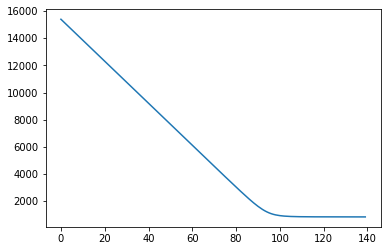

In [393]:
plt.plot(loss1)

In [367]:
model2 = logit(X1_train, y1_train ,add_intercept = True)
loss2, betas2 = model2.fit(method = "SGD", verbose = True, max_iter = 100, lr = 0.00005, stop_condition = 0.00000001)
print("SGD accuracy:", model2.accuracy(model2.X, model2.y))
print("SGD recall:", model2.recall(model2.X, model2.y))
print("SGD precision:", model2.precision(model2.X, model2.y))
print("SGD F measure:", model2.f_measure(model2.X, model2.y))

Breaking
0.0
iteration 1 loss function value = 19720.32886478088
SGD accuracy: 0.3791157102539981
SGD recall: 0.0030257186081694403
SGD precision: 0.6666666666666666
SGD F measure: 0.006024096385542168


In [361]:
model3 = logit(X1_train, y1_train, add_intercept = True)
loss3, betas3 = model3.fit(method = "IRLS2", verbose = True, max_iter = 10, lr = 0.01, stop_condition = 0.0001)
print("IRLS accuracy:", model3.accuracy(model3.X, model3.y))
print("IRLS recall:", model3.recall(model3.X, model3.y))
print("IRLS precision:", model3.precision(model3.X, model3.y))
print("IRLS F measure:", model3.f_measure(model3.X, model3.y))

iteration 1 loss function value = 4.3276493499897967e-13
iteration 2 loss function value = -0.0
iteration 3 loss function value = -0.0
iteration 4 loss function value = -0.0
iteration 5 loss function value = 386.8872513023671
iteration 6 loss function value = -0.0
iteration 7 loss function value = 634.87484106185
iteration 8 loss function value = -0.0
iteration 9 loss function value = 336.1323515000149
IRLS accuracy: 0.5512699905926622
IRLS recall: 0.32223903177004537
IRLS precision: 0.8801652892561983
IRLS F measure: 0.47176079734219273


/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp


In [372]:
model3 = null_logit(X1_train, y1_train, add_intercept = True)
loss3, betas3 = model3.fit(method = "IRLS2", verbose = True, max_iter = 10, lr = 0.01, stop_condition = 0.0001)
print("IRLS accuracy:", model3.accuracy(model3.X, model3.y))
print("IRLS recall:", model3.recall(model3.X, model3.y))
print("IRLS precision:", model3.precision(model3.X, model3.y))
print("IRLS F measure:", model3.f_measure(model3.X, model3.y))

iteration 1 loss function value = 13252.242056691979
iteration 2 loss function value = -0.0
iteration 3 loss function value = 564.6481135418726
iteration 4 loss function value = 706.9897832542265
iteration 5 loss function value = -0.0
iteration 6 loss function value = 597.1591426686355
iteration 7 loss function value = 516.7722554004529
iteration 8 loss function value = -0.0
iteration 9 loss function value = -0.0
IRLS accuracy: 0.6218250235183443
IRLS recall: 1.0
IRLS precision: 0.6218250235183443
IRLS F measure: 0.7668213457076566


/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [238]:
#np.seterr(divide='ignore', invalid='ignore')
model_multi_1 = logit(X_multi_train, Y_multi_train ,add_intercept = True)
loss_multi_1, betas_multi_1 = model_multi_1.fit(method = "GD", verbose = True, max_iter = 40, lr = 0.005, stop_condition = 0.00001 )
print("GD accuracy:", model_multi_1.accuracy(model_multi_1.X, model_multi_1.y))
print("GD recall:", model_multi_1.recall(model_multi_1.X, model_multi_1.y))
print("GD precision:", model_multi_1.precision(model_multi_1.X, model_multi_1.y))
print("GD F measure:", model_multi_1.f_measure(model_multi_1.X, model_multi_1.y))

#print(betas1[-1])

(3, 2) (112, 3)
iteration 1 loss function value = -492.3152994735067
(3, 2) (112, 3)
iteration 2 loss function value = -493.2447863468226
(3, 2) (112, 3)
iteration 3 loss function value = -494.17488437275904
(3, 2) (112, 3)
iteration 4 loss function value = -495.1055865736217
(3, 2) (112, 3)
iteration 5 loss function value = -496.0368860465529
(3, 2) (112, 3)
iteration 6 loss function value = -496.9687759628642
(3, 2) (112, 3)
iteration 7 loss function value = -497.9012495673719
(3, 2) (112, 3)
iteration 8 loss function value = -498.83430017773503
(3, 2) (112, 3)
iteration 9 loss function value = -499.7679211837955
(3, 2) (112, 3)
iteration 10 loss function value = -500.7021060469223
(3, 2) (112, 3)
iteration 11 loss function value = -501.6368482993565
(3, 2) (112, 3)
iteration 12 loss function value = -502.5721415435608
(3, 2) (112, 3)
iteration 13 loss function value = -503.5079794515715
(3, 2) (112, 3)
iteration 14 loss function value = -504.44435576435296
(3, 2) (112, 3)
iteration 

In [239]:
model_multi_2 = logit(X_multi_train, Y_multi_train ,add_intercept = True)
loss_multi_2, betas_multi_2 = model_multi_2.fit(method = "SGD", verbose = True, max_iter = 100, lr = 0.01, stop_condition = 0.00000001)
print("SGD accuracy:", model_multi_2.accuracy(model_multi_2.X, model_multi_2.y))
print("SGD recall:", model_multi_2.recall(model_multi_2.X, model_multi_2.y))
print("SGD precision:", model_multi_2.precision(model_multi_1.X, model_multi_1.y))
print("SGD F measure:", model_multi_2.f_measure(model_multi_1.X, model_multi_1.y))

0.49560670340617846
iteration 1 loss function value = 650.3890397935866
0.11575064616929981
iteration 2 loss function value = 646.9259759496636
0.06307686888907338
iteration 3 loss function value = 645.2665331334093
0.04269389589476775
iteration 4 loss function value = 644.1156219346889
0.03196770159084282
iteration 5 loss function value = 643.3444420548839
0.025384914166119626
iteration 6 loss function value = 642.9322751773345
0.020951070499141133
iteration 7 loss function value = 642.87105540838
0.017771511795995804
iteration 8 loss function value = 643.1559462032535
0.015385898382926493
iteration 9 loss function value = 643.7839136814873
0.013533568954377972
iteration 10 loss function value = 644.7531479141736
0.012056088108727256
iteration 11 loss function value = 646.0626248013489
0.010851738854655983
iteration 12 loss function value = 647.7116935695116
0.009852306554409645
iteration 13 loss function value = 649.6996454088808
0.009010384761677285
iteration 14 loss function value 

In [42]:
model2.X.shape

(426, 5)

In [118]:
y1_train.mean()

0.09816091954022989

In [119]:
y1_test.mean()

0.09028256374913853

In [43]:
betas2[-1].reshape(1,-1)[:,1:]

array([[ 1.12697804,  1.8836361 ,  0.53816435, -1.15908311]])

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "lbfgs", fit_intercept=True, max_iter=1000)
model.fit(X1_train, y1_train)
print(model.score(X1_train, y1_train))
model.coef_

0.9038793103448276


array([[-1.92093266e-12, -1.88008283e-12, -1.86066965e-12,
        -1.73261110e-12, -1.86054453e-12, -1.80848485e-12,
        -1.23179421e-14, -1.14656623e-07, -2.63900412e-16,
         1.18071756e-16, -7.73609476e-16, -1.31709861e-14,
        -1.67427823e-15, -9.21501045e-16,  1.63446256e-15,
        -7.53259397e-15, -2.06003973e-15]])

In [27]:
from statsmodels.discrete.discrete_model import Logit

#X = df.drop("chd", axis = 1, inplace=False)
#y = df.chd

model = Logit(endog = y1_train, exog = X1_train)
res = model.fit()
np.sum((res.predict(X1_train) > 0.5) == y1_train) / X1_train.shape[0]

Optimization terminated successfully.
         Current function value: 0.229942
         Iterations 8


0.9144396551724138

In [387]:
X.shape

(150, 2)

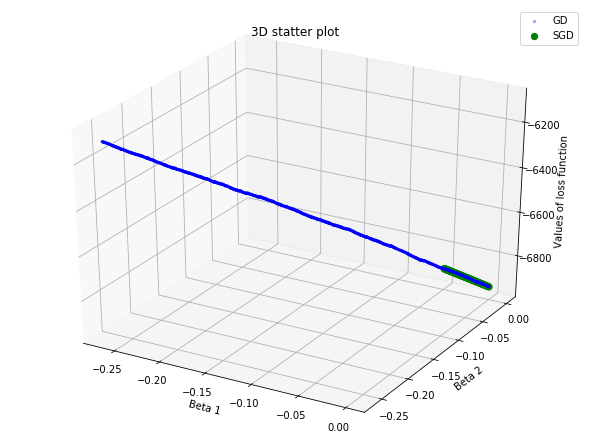

In [126]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig)

sequence_containing_x_vals1 = [i[0][0] for i in betas1]
sequence_containing_y_vals1 = [i[1][0] for i in betas1]
sequence_containing_z_vals1 = loss1

sequence_containing_x_vals2 = [i[0][0] for i in betas2]
sequence_containing_y_vals2 = [i[1][0] for i in betas2]
sequence_containing_z_vals2 = loss2


ax.scatter(sequence_containing_x_vals2, sequence_containing_y_vals2, sequence_containing_z_vals2, marker = "o",
          color = "blue", s = 5, alpha =0.3)
ax.scatter(sequence_containing_x_vals1, sequence_containing_y_vals1, sequence_containing_z_vals1, marker = "o",
          color = "green", s = 40)

plt.title("3D statter plot")
ax.set_xlabel("Beta 1")
ax.set_ylabel("Beta 2")
ax.set_zlabel("Values of loss function")
plt.legend(["GD", "SGD"])
plt.show()